In [1]:
# download the dataset from kaggle if you do not have a Kaggle account, you need to create one
# Use the Kaggle public API and output a token into your local drive ("Downloads" for windows PCs)

!pip install -q kaggle
from google.colab import files
files.upload() #Upload the token file containing  the token
# create a directory named kaggle and copy kaggle.json file to kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d jessicali9530/celeba-dataset

# unzip the dataset to the current directory and remove the zip file
!unzip celeba-dataset.zip -d celeba-dataset && rm celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba-dataset/img_align_celeba/img_

# R1

In [ ]:
import pandas as pd
celeb_atr = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
celeb_atr

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
celeb_atr.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
columns_to_drop = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']  # Replace with your list of columns to drop

# Droped the specified columns
filtered_df = celeb_atr.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(filtered_df)

          image_id  Bushy_Eyebrows  Male
0       000001.jpg              -1    -1
1       000002.jpg              -1    -1
2       000003.jpg              -1     1
3       000004.jpg              -1    -1
4       000005.jpg              -1    -1
...            ...             ...   ...
202594  202595.jpg              -1    -1
202595  202596.jpg              -1     1
202596  202597.jpg              -1     1
202597  202598.jpg               1    -1
202598  202599.jpg              -1    -1

[202599 rows x 3 columns]


In [ ]:
celeb_bbox = pd.read_csv('celeba-dataset/list_bbox_celeba.csv')
celeb_bbox

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


In [ ]:
celeb_bbox.columns

Index(['image_id', 'x_1', 'y_1', 'width', 'height'], dtype='object')

In [ ]:
celeb_part = pd.read_csv('celeba-dataset/list_eval_partition.csv')
celeb_part

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [ ]:
celeb_landmark = pd.read_csv('celeba-dataset/list_landmarks_align_celeba.csv')
celeb_landmark

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151


In [ ]:
# perform an outer join of the anno and bbox data frames on image_id
#result = pd.merge(filtered_df,celeb_bbox, on='image_id', how='outer')
#result

# perform an outer join of the result with the partition data frame on image_id to obtain integrated partitions
merged = pd.merge(filtered_df,celeb_part,on='image_id', how='outer')


In [ ]:
merged

,image_id,Bushy_Eyebrows,Male,partition
0,000001.jpg,-1,-1,0
1,000002.jpg,-1,-1,0
2,000003.jpg,-1,1,0
3,000004.jpg,-1,-1,0
4,000005.jpg,-1,-1,0
...,...,...,...,...
202594,202595.jpg,-1,-1,2
202595,202596.jpg,-1,1,2
202596,202597.jpg,-1,1,2
202597,202598.jpg,1,-1,2


In [ ]:
merged['Male'] = merged['Male'].map({1: 1, -1: 0})
merged['Bushy_Eyebrows'] = merged['Bushy_Eyebrows'].map({1: 1, -1: 0})


In [ ]:
merged['target'] = ((merged['Bushy_Eyebrows'] == 1) & (merged['Male'] == 1)).astype(int)


i have created a target variable and give values 1 and 0 ,1 for Male and who has Bushy_Eyebrows and 0 for others

In [ ]:
merged

,image_id,Bushy_Eyebrows,Male,partition,target
0,000001.jpg,0,0,0,0
1,000002.jpg,0,0,0,0
2,000003.jpg,0,1,0,0
3,000004.jpg,0,0,0,0
4,000005.jpg,0,0,0,0
...,...,...,...,...,...
202594,202595.jpg,0,0,2,0
202595,202596.jpg,0,1,2,0
202596,202597.jpg,0,1,2,0
202597,202598.jpg,1,0,2,0


In [ ]:
merged.to_csv('hello.csv', index=False)

In [ ]:
# divide the integrated data frame into train, test and validation data frames based on the partition column 0-train, 1-test, 2-validation
train_df = merged[merged['partition'] == 0]
test_df = merged[merged['partition'] == 1]
val_df = merged[merged['partition'] == 2]

In [ ]:
train_df = train_df.sample(frac=0.1)
train_df.head()

,image_id,Bushy_Eyebrows,Male,partition,target
34636,034637.jpg,0,0,0,0
92391,092392.jpg,0,0,0,0
128842,128843.jpg,0,0,0,0
32939,032940.jpg,0,0,0,0
18940,018941.jpg,0,0,0,0


In [ ]:
test_df = test_df.sample(frac=0.1)
test_df.head()

,image_id,Bushy_Eyebrows,Male,partition,target
182359,182360.jpg,0,0,1,0
180507,180508.jpg,0,0,1,0
171325,171326.jpg,0,1,1,0
165649,165650.jpg,1,1,1,1
165425,165426.jpg,0,0,1,0


In [ ]:
val_df = val_df.sample(frac=0.1)
val_df.head()

,image_id,Bushy_Eyebrows,Male,partition,target
191890,191891.jpg,0,0,2,0
199217,199218.jpg,0,0,2,0
185247,185248.jpg,0,1,2,0
198620,198621.jpg,0,0,2,0
183784,183785.jpg,0,0,2,0


In [ ]:
# Importing needed libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

class DataGenerator(tf.keras.utils.Sequence):

    def __init__(self, df, batch_size=32, dim=(64,64), n_channels=3, shuffle=True):
        # Since n_classes is not needed for binary classification, it is removed
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        df_temp = self.df.iloc[indexes]
        X, y = self.__data_generation(df_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, df_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        # For binary classification, y is an array of scalars
        y = np.empty((self.batch_size), dtype=int)
        for i, row in enumerate(df_temp.values):
            img_path = 'celeba-dataset/img_align_celeba/img_align_celeba/' + row[0]  # Note the column index for image_id
            img = image.load_img(img_path)
            img = img.resize(self.dim)
            img = image.img_to_array(img)

            X[i,] = img / 255.0

            # For binary classification, target is a scalar
            y[i] = row[-1]  # Assuming 'target' is the last column

        return X, y


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator = DataGenerator(train_df, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator = DataGenerator(val_df, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator = DataGenerator(test_df, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)


In [ ]:
# Training the model with binary classification in mind
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
508/508 [==============================] - 36s 56ms/step - loss: 17.4050 - accuracy: 0.8507 - val_loss: 0.5819 - val_accuracy: 0.9168
Epoch 2/5
508/508 [==============================] - 27s 53ms/step - loss: 0.4863 - accuracy: 0.8981 - val_loss: 0.4839 - val_accuracy: 0.8503
Epoch 3/5
508/508 [==============================] - 27s 53ms/step - loss: 0.8139 - accuracy: 0.8826 - val_loss: 0.1956 - val_accuracy: 0.9204
Epoch 4/5
508/508 [==============================] - 28s 54ms/step - loss: 0.2416 - accuracy: 0.9130 - val_loss: 0.3378 - val_accuracy: 0.8614
Epoch 5/5
508/508 [==============================] - 27s 53ms/step - loss: 0.1916 - accuracy: 0.9233 - val_loss: 0.1713 - val_accuracy: 0.9325


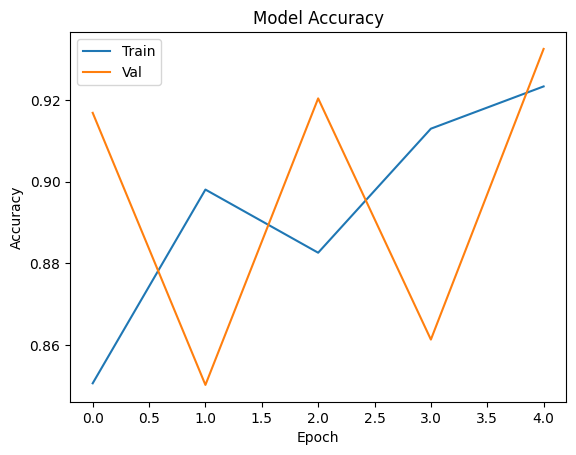

In [ ]:
# plotting the training and validation accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# R2

In [ ]:
import pandas as pd
celeb_atr2 = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
celeb_atr2

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
columns_to_drop = ['5_o_Clock_Shadow', 'Bushy_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']  # Replace with your list of columns to drop

# Droped the specified columns
filtered_df2 = celeb_atr2.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(filtered_df2)

          image_id  Arched_Eyebrows  Male
0       000001.jpg                1    -1
1       000002.jpg               -1    -1
2       000003.jpg               -1     1
3       000004.jpg               -1    -1
4       000005.jpg                1    -1
...            ...              ...   ...
202594  202595.jpg               -1    -1
202595  202596.jpg               -1     1
202596  202597.jpg               -1     1
202597  202598.jpg                1    -1
202598  202599.jpg                1    -1

[202599 rows x 3 columns]


In [ ]:
merged2 = pd.merge(filtered_df2,celeb_part,on='image_id', how='outer')

In [ ]:
merged2['Male'] = merged2['Male'].map({1: 1, -1: 0})
merged2['Arched_Eyebrows'] = merged2['Arched_Eyebrows'].map({1: 1, -1: 0})

In [ ]:
merged2['target'] = ((merged2['Arched_Eyebrows'] == 1) & (merged2['Male'] == 0)).astype(int)

i have created a target variable and give values 1 and 0 ,1 for female and who has Arched_Eyebrows and 0 for others

In [ ]:
merged2

,image_id,Arched_Eyebrows,Male,partition,target
0,000001.jpg,1,0,0,1
1,000002.jpg,0,0,0,0
2,000003.jpg,0,1,0,0
3,000004.jpg,0,0,0,0
4,000005.jpg,1,0,0,1
...,...,...,...,...,...
202594,202595.jpg,0,0,2,0
202595,202596.jpg,0,1,2,0
202596,202597.jpg,0,1,2,0
202597,202598.jpg,1,0,2,1


In [ ]:
# divide the integrated data frame into train validation data frames based on the partition column 0-train, 1-test, 2-validation
train_df2 = merged2[merged2['partition'] == 0]
test_df2 = merged2[merged2['partition'] == 1]
val_df2 = merged2[merged2['partition'] == 2]

In [ ]:
train_df2 = train_df2.sample(frac=0.1)
train_df2.head()

,image_id,Arched_Eyebrows,Male,partition,target
113419,113420.jpg,1,0,0,1
89678,089679.jpg,0,1,0,0
88205,088206.jpg,0,0,0,0
25318,025319.jpg,0,0,0,0
83315,083316.jpg,0,0,0,0


In [ ]:
test_df2 = test_df2.sample(frac=0.1)
test_df2.head()

,image_id,Arched_Eyebrows,Male,partition,target
170903,170904.jpg,0,1,1,0
171932,171933.jpg,1,0,1,1
178723,178724.jpg,0,0,1,0
164074,164075.jpg,0,1,1,0
167901,167902.jpg,0,1,1,0


In [ ]:
val_df2 = val_df2.sample(frac=0.1)
val_df2.head()

,image_id,Arched_Eyebrows,Male,partition,target
184713,184714.jpg,0,0,2,0
189144,189145.jpg,0,0,2,0
201410,201411.jpg,0,0,2,0
199762,199763.jpg,1,0,2,1
184925,184926.jpg,0,1,2,0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

class DataGenerator(tf.keras.utils.Sequence):

    def __init__(self, df, batch_size=32, dim=(64,64), n_channels=3, shuffle=True):
        # Since n_classes is not needed for binary classification, it is removed
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        df_temp = self.df.iloc[indexes]
        X, y = self.__data_generation(df_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, df_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        # For binary classification, y is an array of scalars
        y = np.empty((self.batch_size), dtype=int)
        for i, row in enumerate(df_temp.values):
            img_path = 'celeba-dataset/img_align_celeba/img_align_celeba/' + row[0]  # Note the column index for image_id
            img = image.load_img(img_path)
            img = img.resize(self.dim)
            img = image.img_to_array(img)

            X[i,] = img / 255.0

            # For binary classification, target is a scalar
            y[i] = row[-1]  # Assuming 'target' is the last column

        return X, y


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model2 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator2 = DataGenerator(train_df2, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator2 = DataGenerator(val_df2, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generato2 = DataGenerator(test_df2, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)


In [ ]:
# Training the model with binary classification in mind
history2 = model2.fit(train_generator2, epochs=5, validation_data=val_generator2)

Epoch 1/5
508/508 [==============================] - 29s 54ms/step - loss: 10.9473 - accuracy: 0.7141 - val_loss: 3.9489 - val_accuracy: 0.7308
Epoch 2/5
508/508 [==============================] - 27s 53ms/step - loss: 0.7410 - accuracy: 0.7739 - val_loss: 0.5518 - val_accuracy: 0.7495
Epoch 3/5
508/508 [==============================] - 27s 54ms/step - loss: 0.4253 - accuracy: 0.7908 - val_loss: 0.4484 - val_accuracy: 0.7717
Epoch 4/5
508/508 [==============================] - 28s 55ms/step - loss: 0.4322 - accuracy: 0.7769 - val_loss: 0.4804 - val_accuracy: 0.7308
Epoch 5/5
508/508 [==============================] - 27s 53ms/step - loss: 0.5124 - accuracy: 0.7554 - val_loss: 0.5854 - val_accuracy: 0.7308


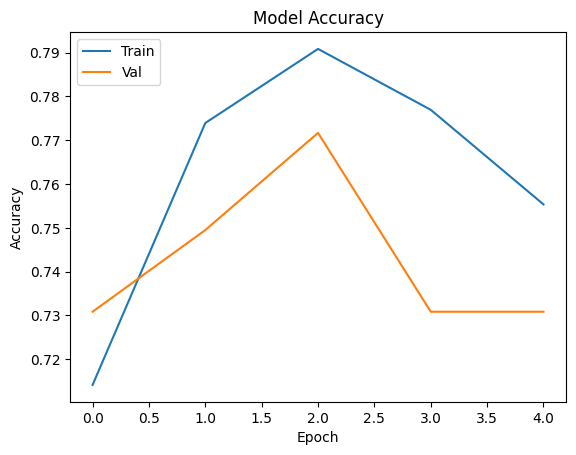

In [ ]:
# plotting the training and validation accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# R3

In [ ]:
import pandas as pd
celeb_atr3 = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
celeb_atr3

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
import pandas as pd

# Load the dataset
df_landmarks = pd.read_csv('/content/celeba-dataset/list_landmarks_align_celeba.csv')

# Compute the eye width for each entry
df_landmarks['eye_width'] = df_landmarks['lefteye_x'] - df_landmarks['righteye_x']
df_landmarks['eye_width'] = df_landmarks['eye_width'].abs()  # Ensure positive values

# Normalize the eye_width to [0, 1]
eye_width_min = df_landmarks['eye_width'].min()
eye_width_max = df_landmarks['eye_width'].max()

df_landmarks['eye_width_normalized'] = (df_landmarks['eye_width'] - eye_width_min) / (eye_width_max - eye_width_min)

# Check the distribution
df_landmarks.head()


,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,eye_width,eye_width_normalized
0,000001.jpg,69,109,106,113,77,142,73,152,108,154,37,0.532258
1,000002.jpg,69,110,107,112,81,135,70,151,108,153,38,0.548387
2,000003.jpg,76,112,104,106,108,128,74,156,98,158,28,0.387097
3,000004.jpg,72,113,108,108,101,138,71,155,101,151,36,0.516129
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,46,0.677419


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the landmarks data
# First, verify column names to ensure 'lefteye_x' and 'righteye_x' are present
df = pd.read_csv('/content/celeba-dataset/list_landmarks_align_celeba.csv')

print(df.columns)

# If the columns exist, compute the eye width
df['eye_width'] = abs(df['righteye_x'] - df['lefteye_x'])

# Normalize the eye width to a range of [0, 1]
eye_width_min = df['eye_width'].min()
eye_width_max = df['eye_width'].max()
df['eye_width_normalized'] = (df['eye_width'] - eye_width_min) / (eye_width_max - eye_width_min)

# Quantize the normalized eye width into 4 quartiles
df['eye_width_quartile'] = pd.qcut(df['eye_width_normalized'], 4, labels=[1, 2, 3, 4])

# Example to check if everything is correct
df


Index(['image_id', 'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y',
       'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y'],
      dtype='object')


,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,eye_width,eye_width_normalized,eye_width_quartile
0,000001.jpg,69,109,106,113,77,142,73,152,108,154,37,0.532258,1
1,000002.jpg,69,110,107,112,81,135,70,151,108,153,38,0.548387,2
2,000003.jpg,76,112,104,106,108,128,74,156,98,158,28,0.387097,1
3,000004.jpg,72,113,108,108,101,138,71,155,101,151,36,0.516129,1
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,46,0.677419,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153,39,0.564516,2
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150,43,0.629032,4
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153,38,0.548387,2
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151,39,0.564516,2


In [ ]:
import pandas as pd
celeb_atr3 = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
celeb_atr3

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
columns_to_drop = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young','Bushy_Eyebrows']  # Replace with your list of columns to drop

# Droped the specified columns
filtered_df3 = celeb_atr3.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(filtered_df3)

          image_id  Male  Smiling
0       000001.jpg    -1        1
1       000002.jpg    -1        1
2       000003.jpg     1       -1
3       000004.jpg    -1       -1
4       000005.jpg    -1       -1
...            ...   ...      ...
202594  202595.jpg    -1       -1
202595  202596.jpg     1        1
202596  202597.jpg     1        1
202597  202598.jpg    -1        1
202598  202599.jpg    -1       -1

[202599 rows x 3 columns]


In [ ]:
filtered_df3['Male'] = filtered_df3['Male'].map({1: 1, -1: 0})
filtered_df3['Smiling'] = filtered_df3['Smiling'].map({1: 1, -1: 0})

In [ ]:
merged3 = pd.merge(filtered_df3,df,on='image_id', how='outer')

In [ ]:
merged3

,image_id,Male,Smiling,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,eye_width,eye_width_normalized,eye_width_quartile
0,000001.jpg,0,1,69,109,106,113,77,142,73,152,108,154,37,0.532258,1
1,000002.jpg,0,1,69,110,107,112,81,135,70,151,108,153,38,0.548387,2
2,000003.jpg,1,0,76,112,104,106,108,128,74,156,98,158,28,0.387097,1
3,000004.jpg,0,0,72,113,108,108,101,138,71,155,101,151,36,0.516129,1
4,000005.jpg,0,0,66,114,112,112,86,119,71,147,104,150,46,0.677419,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,69,111,108,111,89,140,73,151,104,153,39,0.564516,2
202595,202596.jpg,1,1,67,112,110,112,85,141,66,150,110,150,43,0.629032,4
202596,202597.jpg,1,1,69,111,107,111,92,137,68,151,109,153,38,0.548387,2
202597,202598.jpg,0,1,69,111,108,111,90,137,71,153,106,151,39,0.564516,2


In [ ]:
print(merged3.columns)


Index(['image_id', 'Male', 'Smiling', 'lefteye_x', 'lefteye_y', 'righteye_x',
       'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y',
       'rightmouth_x', 'rightmouth_y', 'eye_width', 'eye_width_normalized',
       'eye_width_quartile'],
      dtype='object')


In [ ]:
columns_to_drop = ['Smiling', 'lefteye_x', 'lefteye_y', 'righteye_x',
       'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y',
       'rightmouth_x', 'rightmouth_y', 'eye_width','eye_width_normalized']

In [ ]:
filtered_df4 = merged3.drop(columns=columns_to_drop)
merged4 = pd.merge(filtered_df4,celeb_part,on='image_id', how='outer')



In [ ]:
merged4

,image_id,Male,eye_width_quartile,partition
0,000001.jpg,0,1,0
1,000002.jpg,0,2,0
2,000003.jpg,1,1,0
3,000004.jpg,0,1,0
4,000005.jpg,0,4,0
...,...,...,...,...
202594,202595.jpg,0,2,2
202595,202596.jpg,1,4,2
202596,202597.jpg,1,2,2
202597,202598.jpg,0,2,2


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
merged4.to_csv('output.csv', index=False)


In [ ]:
merged4 = pd.read_csv('output.csv')


In [ ]:
merged3_1=merged4['target'] = ((merged4['eye_width_quartile'] == 1) & (merged4['Male'] == 0)).astype(int)

In [ ]:
merged3_1

0         1
1         0
2         0
3         1
4         0
         ..
202594    0
202595    0
202596    0
202597    0
202598    0
Length: 202599, dtype: int64

In [ ]:
merged4['target'].unique()

array([1, 0])

In [ ]:
train_df3 = merged4[merged4['partition'] == 0]
test_df3 = merged4[merged4['partition'] == 1]
val_df3 = merged4[merged4['partition'] == 2]


In [ ]:
train_df3 = train_df3.sample(frac=0.1)
train_df3.head()

,image_id,Male,eye_width_quartile,partition,target
154838,154839.jpg,1,1,0,0
152273,152274.jpg,0,3,0,0
21039,021040.jpg,0,1,0,1
134227,134228.jpg,0,2,0,0
138470,138471.jpg,0,1,0,1


In [ ]:
test_df3 = test_df3.sample(frac=0.1)
test_df3.head()

,image_id,Male,eye_width_quartile,partition,target
176884,176885.jpg,1,2,1,0
178985,178986.jpg,1,1,1,0
175095,175096.jpg,1,1,1,0
166613,166614.jpg,0,3,1,0
180965,180966.jpg,0,1,1,1


In [ ]:
val_df3 = val_df3.sample(frac=0.1)
val_df3.head()

,image_id,Male,eye_width_quartile,partition,target
188782,188783.jpg,0,2,2,0
196808,196809.jpg,0,2,2,0
194555,194556.jpg,1,2,2,0
191083,191084.jpg,1,4,2,0
184757,184758.jpg,1,3,2,0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model3 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator3 = DataGenerator(train_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator3 = DataGenerator(test_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator3 = DataGenerator(val_df3, batch_size=32, dim=(64,64), n_channels=3,shuffle=True)

In [ ]:
# Training the model with binary classification in mind
history3 = model3.fit(train_generator3, epochs=5, validation_data=val_generator3)

Epoch 1/5
508/508 [==============================] - 29s 54ms/step - loss: 10.8722 - accuracy: 0.7969 - val_loss: 0.8693 - val_accuracy: 0.7853
Epoch 2/5
508/508 [==============================] - 27s 52ms/step - loss: 0.4513 - accuracy: 0.8677 - val_loss: 0.5436 - val_accuracy: 0.7853
Epoch 3/5
508/508 [==============================] - 27s 53ms/step - loss: 0.4559 - accuracy: 0.8682 - val_loss: 0.6516 - val_accuracy: 0.7233
Epoch 4/5
508/508 [==============================] - 27s 52ms/step - loss: 0.5976 - accuracy: 0.8577 - val_loss: 0.2634 - val_accuracy: 0.8810
Epoch 5/5
508/508 [==============================] - 27s 52ms/step - loss: 0.2373 - accuracy: 0.8971 - val_loss: 0.2778 - val_accuracy: 0.8826


#R3B

In [ ]:
merged4

,image_id,Male,eye_width_quartile,partition,target
0,000001.jpg,0,1,0,1
1,000002.jpg,0,2,0,0
2,000003.jpg,1,1,0,0
3,000004.jpg,0,1,0,1
4,000005.jpg,0,4,0,0
...,...,...,...,...,...
202594,202595.jpg,0,2,2,0
202595,202596.jpg,1,4,2,0
202596,202597.jpg,1,2,2,0
202597,202598.jpg,0,2,2,0


In [ ]:
merged4 = pd.merge(filtered_df4,celeb_part,on='image_id', how='outer')



In [ ]:
merged3_2=merged4['target'] = ((merged4['eye_width_quartile'] == 4) & (merged4['Male'] == 0)).astype(int)

In [ ]:
merged4['target'].unique()

array([0, 1])

In [ ]:
train_df3 = merged4[merged4['partition'] == 0]
test_df3 = merged4[merged4['partition'] == 1]
val_df3 = merged4[merged4['partition'] == 2]


In [ ]:
train_df3 = train_df3.sample(frac=0.1)
train_df3.head()

,image_id,Male,eye_width_quartile,partition,target
130807,130808.jpg,0,3,0,0
152421,152422.jpg,1,2,0,0
88784,088785.jpg,1,1,0,0
135657,135658.jpg,0,4,0,1
91430,091431.jpg,1,3,0,0


In [ ]:
test_df3 = test_df3.sample(frac=0.1)
test_df3.head()

,image_id,Male,eye_width_quartile,partition,target
181432,181433.jpg,0,2,1,0
179294,179295.jpg,1,1,1,0
166964,166965.jpg,0,4,1,1
167159,167160.jpg,0,2,1,0
175458,175459.jpg,1,1,1,0


In [ ]:
val_df3 = val_df3.sample(frac=0.1)
val_df3.head()

,image_id,Male,eye_width_quartile,partition,target
202249,202250.jpg,0,3,2,0
191350,191351.jpg,0,3,2,0
184497,184498.jpg,1,2,2,0
191514,191515.jpg,0,3,2,0
201102,201103.jpg,1,4,2,0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model3 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator3 = DataGenerator(train_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator3 = DataGenerator(test_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator3 = DataGenerator(val_df3, batch_size=32, dim=(64,64), n_channels=3,shuffle=True)

In [ ]:
history3 = model3.fit(train_generator3, epochs=5, validation_data=val_generator3)

Epoch 1/5
508/508 [==============================] - 29s 55ms/step - loss: 13.7631 - accuracy: 0.8056 - val_loss: 1.0682 - val_accuracy: 0.8584
Epoch 2/5
508/508 [==============================] - 27s 53ms/step - loss: 0.7800 - accuracy: 0.8575 - val_loss: 0.4684 - val_accuracy: 0.8649
Epoch 3/5
508/508 [==============================] - 27s 53ms/step - loss: 0.3658 - accuracy: 0.8772 - val_loss: 0.8580 - val_accuracy: 0.7525
Epoch 4/5
508/508 [==============================] - 27s 53ms/step - loss: 0.5046 - accuracy: 0.8730 - val_loss: 0.6120 - val_accuracy: 0.8090
Epoch 5/5
508/508 [==============================] - 27s 53ms/step - loss: 0.2677 - accuracy: 0.8832 - val_loss: 0.2770 - val_accuracy: 0.8841


# R3C

In [ ]:
merged4

,image_id,Male,eye_width_quartile,partition,target
0,000001.jpg,0,1,0,0
1,000002.jpg,0,2,0,0
2,000003.jpg,1,1,0,0
3,000004.jpg,0,1,0,0
4,000005.jpg,0,4,0,1
...,...,...,...,...,...
202594,202595.jpg,0,2,2,0
202595,202596.jpg,1,4,2,0
202596,202597.jpg,1,2,2,0
202597,202598.jpg,0,2,2,0


In [ ]:
merged3_3=merged4['target'] = ((merged4['eye_width_quartile'] == 1) & (merged4['Male'] == 1)).astype(int)

In [ ]:
merged3_3

0         0
1         0
2         1
3         0
4         0
         ..
202594    0
202595    0
202596    0
202597    0
202598    0
Length: 202599, dtype: int64

In [ ]:
merged4['target'].unique()

array([0, 1])

In [ ]:
train_df3 = merged4[merged4['partition'] == 0]
test_df3 = merged4[merged4['partition'] == 1]
val_df3 = merged4[merged4['partition'] == 2]


In [ ]:
train_df3 = train_df3.sample(frac=0.1)
train_df3.head()

,image_id,Male,eye_width_quartile,partition,target
97567,097568.jpg,0,4,0,0
149483,149484.jpg,1,1,0,1
38399,038400.jpg,1,1,0,1
22970,022971.jpg,1,2,0,0
104179,104180.jpg,0,3,0,0


In [ ]:
test_df3 = test_df3.sample(frac=0.1)
test_df3.head()

,image_id,Male,eye_width_quartile,partition,target
170715,170716.jpg,0,1,1,0
180402,180403.jpg,0,4,1,0
168643,168644.jpg,0,2,1,0
169790,169791.jpg,0,1,1,0
167634,167635.jpg,0,1,1,0


In [ ]:
val_df3 = val_df3.sample(frac=0.1)
val_df3.head()

,image_id,Male,eye_width_quartile,partition,target
197458,197459.jpg,1,1,2,1
186347,186348.jpg,0,4,2,0
199521,199522.jpg,1,2,2,0
193305,193306.jpg,0,4,2,0
202187,202188.jpg,0,4,2,0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model3 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator3 = DataGenerator(train_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator3 = DataGenerator(test_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator3 = DataGenerator(val_df3, batch_size=32, dim=(64,64), n_channels=3,shuffle=True)

In [ ]:
# Training the model with binary classification in mind
history3 = model3.fit(train_generator3, epochs=5, validation_data=val_generator3)

Epoch 1/5
508/508 [==============================] - 29s 55ms/step - loss: 10.2989 - accuracy: 0.7736 - val_loss: 0.4868 - val_accuracy: 0.8735
Epoch 2/5
508/508 [==============================] - 27s 53ms/step - loss: 0.3744 - accuracy: 0.8543 - val_loss: 0.2343 - val_accuracy: 0.8977
Epoch 3/5
508/508 [==============================] - 27s 53ms/step - loss: 0.3102 - accuracy: 0.8687 - val_loss: 0.4235 - val_accuracy: 0.8614
Epoch 4/5
508/508 [==============================] - 27s 53ms/step - loss: 0.3149 - accuracy: 0.8680 - val_loss: 0.2415 - val_accuracy: 0.8992
Epoch 5/5
508/508 [==============================] - 27s 53ms/step - loss: 0.4150 - accuracy: 0.8394 - val_loss: 0.4504 - val_accuracy: 0.8362


# R3D

In [ ]:
merged4

,image_id,Male,eye_width_quartile,partition,target
0,000001.jpg,0,1,0,0
1,000002.jpg,0,2,0,0
2,000003.jpg,1,1,0,1
3,000004.jpg,0,1,0,0
4,000005.jpg,0,4,0,0
...,...,...,...,...,...
202594,202595.jpg,0,2,2,0
202595,202596.jpg,1,4,2,0
202596,202597.jpg,1,2,2,0
202597,202598.jpg,0,2,2,0


In [ ]:
merged3_4=merged4['target'] = ((merged4['eye_width_quartile'] == 4) & (merged4['Male'] == 1)).astype(int)

In [ ]:
merged3_4

0         0
1         0
2         0
3         0
4         0
         ..
202594    0
202595    1
202596    0
202597    0
202598    0
Length: 202599, dtype: int64

In [ ]:
merged4['target'].unique()

array([0, 1])

In [ ]:
train_df3 = merged4[merged4['partition'] == 0]
test_df3 = merged4[merged4['partition'] == 1]
val_df3 = merged4[merged4['partition'] == 2]


In [ ]:
train_df3 = train_df3.sample(frac=0.1)
train_df3.head()

,image_id,Male,eye_width_quartile,partition,target
77744,077745.jpg,0,1,0,0
89695,089696.jpg,1,1,0,0
135583,135584.jpg,0,1,0,0
64615,064616.jpg,0,1,0,0
19182,019183.jpg,0,4,0,0


In [ ]:
test_df3 = test_df3.sample(frac=0.1)
test_df3.head()

,image_id,Male,eye_width_quartile,partition,target
163554,163555.jpg,0,4,1,0
173455,173456.jpg,1,1,1,0
181347,181348.jpg,0,4,1,0
181905,181906.jpg,1,1,1,0
163035,163036.jpg,1,1,1,0


In [ ]:
val_df3 = val_df3.sample(frac=0.1)
val_df3.head()

,image_id,Male,eye_width_quartile,partition,target
190775,190776.jpg,0,4,2,0
184931,184932.jpg,1,2,2,0
188243,188244.jpg,0,2,2,0
183171,183172.jpg,1,1,2,0
195202,195203.jpg,1,1,2,0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model3 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator3 = DataGenerator(train_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator3 = DataGenerator(test_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator3 = DataGenerator(val_df3, batch_size=32, dim=(64,64), n_channels=3,shuffle=True)

In [ ]:
# Training the model with binary classification in mind
history3 = model3.fit(train_generator3, epochs=5, validation_data=val_generator3)

Epoch 1/5
508/508 [==============================] - 28s 53ms/step - loss: 14.1939 - accuracy: 0.8954 - val_loss: 0.6164 - val_accuracy: 0.8357
Epoch 2/5
508/508 [==============================] - 33s 65ms/step - loss: 0.7099 - accuracy: 0.9134 - val_loss: 0.1965 - val_accuracy: 0.9178
Epoch 3/5
508/508 [==============================] - 26s 51ms/step - loss: 0.1821 - accuracy: 0.9382 - val_loss: 0.3111 - val_accuracy: 0.9340
Epoch 4/5
508/508 [==============================] - 26s 52ms/step - loss: 0.1706 - accuracy: 0.9363 - val_loss: 0.1607 - val_accuracy: 0.9309
Epoch 5/5
508/508 [==============================] - 26s 51ms/step - loss: 0.1362 - accuracy: 0.9470 - val_loss: 0.2352 - val_accuracy: 0.9345


In the above 4 classifcations the classification with (FEMALES in Q1) has shown the less accuracy compared to the other which is 80% and others are greater than 90% . in conclution the model is learning and able to predict


# R4

In [ ]:
import pandas as pd
celeb_atr3 = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
celeb_atr3

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
import pandas as pd

# Load the dataset
df_landmarks = pd.read_csv('/content/celeba-dataset/list_landmarks_align_celeba.csv')

# Compute the eye width for each entry
df_landmarks['mouth_width'] = df_landmarks['leftmouth_x'] - df_landmarks['rightmouth_x']
df_landmarks['mouth_width'] = df_landmarks['mouth_width'].abs()  # Ensure positive values

# Normalize the eye_width to [0, 1]
mouth_width_min = df_landmarks['mouth_width'].min()
mouth_width_max = df_landmarks['mouth_width'].max()

df_landmarks['mouth_width_normalized'] = (df_landmarks['mouth_width'] - mouth_width_min) / (mouth_width_max - mouth_width_min)

# Check the distribution
df_landmarks.head()


,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,mouth_width,mouth_width_normalized
0,000001.jpg,69,109,106,113,77,142,73,152,108,154,35,0.557377
1,000002.jpg,69,110,107,112,81,135,70,151,108,153,38,0.606557
2,000003.jpg,76,112,104,106,108,128,74,156,98,158,24,0.377049
3,000004.jpg,72,113,108,108,101,138,71,155,101,151,30,0.475410
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,33,0.524590


In [ ]:
import pandas as pd


df = pd.read_csv('/content/celeba-dataset/list_landmarks_align_celeba.csv')

print(df.columns)

df['mouth_width'] = abs(df['rightmouth_x'] - df['leftmouth_x'])


mouth_width_min = df['mouth_width'].min()
mouth_width_max = df['mouth_width'].max()
df['mouth_width_normalized'] = (df['mouth_width'] - mouth_width_min) / (mouth_width_max - mouth_width_min)

# Quantize the normalized eye width into 4 quartiles
df['mouth_width_quartile'] = pd.qcut(df['mouth_width_normalized'], 4, labels=[1, 2, 3, 4])

# Example to check if everything is correct
df


Index(['image_id', 'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y',
       'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y'],
      dtype='object')


,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,mouth_width,mouth_width_normalized,mouth_width_quartile
0,000001.jpg,69,109,106,113,77,142,73,152,108,154,35,0.557377,3
1,000002.jpg,69,110,107,112,81,135,70,151,108,153,38,0.606557,3
2,000003.jpg,76,112,104,106,108,128,74,156,98,158,24,0.377049,1
3,000004.jpg,72,113,108,108,101,138,71,155,101,151,30,0.475410,1
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,33,0.524590,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153,31,0.491803,2
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150,44,0.704918,4
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153,41,0.655738,4
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151,35,0.557377,3


In [ ]:
merged3 = pd.merge(filtered_df3,df,on='image_id', how='outer')

In [ ]:
merged3

,image_id,Male,Smiling,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,mouth_width,mouth_width_normalized,mouth_width_quartile
0,000001.jpg,0,1,69,109,106,113,77,142,73,152,108,154,35,0.557377,3
1,000002.jpg,0,1,69,110,107,112,81,135,70,151,108,153,38,0.606557,3
2,000003.jpg,1,0,76,112,104,106,108,128,74,156,98,158,24,0.377049,1
3,000004.jpg,0,0,72,113,108,108,101,138,71,155,101,151,30,0.475410,1
4,000005.jpg,0,0,66,114,112,112,86,119,71,147,104,150,33,0.524590,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,69,111,108,111,89,140,73,151,104,153,31,0.491803,2
202595,202596.jpg,1,1,67,112,110,112,85,141,66,150,110,150,44,0.704918,4
202596,202597.jpg,1,1,69,111,107,111,92,137,68,151,109,153,41,0.655738,4
202597,202598.jpg,0,1,69,111,108,111,90,137,71,153,106,151,35,0.557377,3


In [ ]:
print(merged3.columns)


Index(['image_id', 'Male', 'Smiling', 'lefteye_x', 'lefteye_y', 'righteye_x',
       'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y',
       'rightmouth_x', 'rightmouth_y', 'mouth_width', 'mouth_width_normalized',
       'mouth_width_quartile'],
      dtype='object')


In [ ]:
columns_to_drop = ['Male', 'lefteye_x', 'lefteye_y', 'righteye_x',
       'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y',
       'rightmouth_x', 'rightmouth_y', 'mouth_width','mouth_width_normalized']

In [ ]:
filtered_df4 = merged3.drop(columns=columns_to_drop)
merged4 = pd.merge(filtered_df4,celeb_part,on='image_id', how='outer')



# R4A

In [ ]:
merged4

,image_id,Smiling,mouth_width_quartile,partition
0,000001.jpg,1,3,0
1,000002.jpg,1,3,0
2,000003.jpg,0,1,0
3,000004.jpg,0,1,0
4,000005.jpg,0,2,0
...,...,...,...,...
202594,202595.jpg,0,2,2
202595,202596.jpg,1,4,2
202596,202597.jpg,1,4,2
202597,202598.jpg,1,3,2


In [ ]:
merged4_1=merged4['target'] = ((merged4['mouth_width_quartile'] == 4) & (merged4['Smiling'] == 1)).astype(int)

In [ ]:
merged4_1

0         0
1         0
2         0
3         0
4         0
         ..
202594    0
202595    1
202596    1
202597    0
202598    0
Length: 202599, dtype: int64

In [ ]:
merged4['target'].unique()

array([0, 1])

In [ ]:
train_df3 = merged4[merged4['partition'] == 0]
test_df3 = merged4[merged4['partition'] == 1]
val_df3 = merged4[merged4['partition'] == 2]


In [ ]:
train_df3 = train_df3.sample(frac=0.1)
train_df3.head()

,image_id,Smiling,mouth_width_quartile,partition,target
67740,067741.jpg,0,2,0,0
123191,123192.jpg,0,2,0,0
142249,142250.jpg,1,3,0,0
33752,033753.jpg,0,1,0,0
137190,137191.jpg,1,3,0,0


In [ ]:
test_df3 = test_df3.sample(frac=0.1)
test_df3.head()

,image_id,Smiling,mouth_width_quartile,partition,target
172562,172563.jpg,0,1,1,0
177177,177178.jpg,1,4,1,1
164608,164609.jpg,0,1,1,0
182428,182429.jpg,1,3,1,0
180914,180915.jpg,0,2,1,0


In [ ]:
val_df3 = val_df3.sample(frac=0.1)
val_df3.head()

,image_id,Smiling,mouth_width_quartile,partition,target
183024,183025.jpg,1,4,2,1
183495,183496.jpg,1,4,2,1
193403,193404.jpg,1,3,2,0
184189,184190.jpg,0,1,2,0
191956,191957.jpg,0,1,2,0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model3 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator3 = DataGenerator(train_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator3 = DataGenerator(test_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator3 = DataGenerator(val_df3, batch_size=32, dim=(64,64), n_channels=3,shuffle=True)

In [ ]:
# Training the model with binary classification in mind
history3 = model3.fit(train_generator3, epochs=5, validation_data=val_generator3)

Epoch 1/5
508/508 [==============================] - 29s 55ms/step - loss: 8.0680 - accuracy: 0.8476 - val_loss: 1.0244 - val_accuracy: 0.8780
Epoch 2/5
508/508 [==============================] - 26s 52ms/step - loss: 0.4077 - accuracy: 0.9047 - val_loss: 0.2365 - val_accuracy: 0.9153
Epoch 3/5
508/508 [==============================] - 26s 52ms/step - loss: 0.2308 - accuracy: 0.9209 - val_loss: 0.2481 - val_accuracy: 0.9259
Epoch 4/5
508/508 [==============================] - 26s 52ms/step - loss: 0.3747 - accuracy: 0.9086 - val_loss: 0.1787 - val_accuracy: 0.9224
Epoch 5/5
508/508 [==============================] - 27s 52ms/step - loss: 0.3078 - accuracy: 0.9163 - val_loss: 0.5612 - val_accuracy: 0.8246


#R4B

In [ ]:
merged4

,image_id,Smiling,mouth_width_quartile,partition,target
0,000001.jpg,1,3,0,0
1,000002.jpg,1,3,0,0
2,000003.jpg,0,1,0,0
3,000004.jpg,0,1,0,0
4,000005.jpg,0,2,0,0
...,...,...,...,...,...
202594,202595.jpg,0,2,2,0
202595,202596.jpg,1,4,2,1
202596,202597.jpg,1,4,2,1
202597,202598.jpg,1,3,2,0


In [ ]:
merged4_1=merged4['target'] = ((merged4['mouth_width_quartile'] == 1) & (merged4['Smiling'] == 1)).astype(int)

In [ ]:
merged4_1

0         0
1         0
2         0
3         0
4         0
         ..
202594    0
202595    0
202596    0
202597    0
202598    0
Length: 202599, dtype: int64

In [ ]:
merged4['target'].unique()

array([0, 1])

In [ ]:
train_df3 = merged4[merged4['partition'] == 0]
test_df3 = merged4[merged4['partition'] == 1]
val_df3 = merged4[merged4['partition'] == 2]


In [ ]:
train_df3 = train_df3.sample(frac=0.1)
train_df3.head()

,image_id,Smiling,mouth_width_quartile,partition,target
127404,127405.jpg,0,2,0,0
125832,125833.jpg,1,3,0,0
100552,100553.jpg,1,4,0,0
88875,088876.jpg,0,2,0,0
136969,136970.jpg,1,2,0,0


In [ ]:
test_df3 = test_df3.sample(frac=0.1)
test_df3.head()

,image_id,Smiling,mouth_width_quartile,partition,target
166291,166292.jpg,0,1,1,0
168954,168955.jpg,0,2,1,0
171259,171260.jpg,0,3,1,0
173710,173711.jpg,0,1,1,0
168986,168987.jpg,0,2,1,0


In [ ]:
val_df3 = val_df3.sample(frac=0.1)
val_df3.head()

,image_id,Smiling,mouth_width_quartile,partition,target
192721,192722.jpg,0,2,2,0
199150,199151.jpg,1,4,2,0
190994,190995.jpg,1,4,2,0
187870,187871.jpg,1,4,2,0
189563,189564.jpg,0,2,2,0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the VGG16 model
vgg16 = tf.keras.applications.VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
vgg16.trainable = False

# Get the output of the 15th layer from the top of the VGG16 model
x = vgg16.layers[-15].output

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add a dense layer for classification
x = Dense(512, activation='relu')(x)

# Add more hidden layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Adjust the output layer for binary classification (1 neuron with sigmoid activation)
output_layer = Dense(1, activation='sigmoid')(x)  # Adjusted for binary classification

# Create a new model
model3 = Model(inputs=vgg16.input, outputs=output_layer)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator3 = DataGenerator(train_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
test_generator3 = DataGenerator(test_df3, batch_size=32, dim=(64,64), n_channels=3, shuffle=True)
val_generator3 = DataGenerator(val_df3, batch_size=32, dim=(64,64), n_channels=3,shuffle=True)

In [ ]:
# Training the model with binary classification in mind
history3 = model3.fit(train_generator3, epochs=5, validation_data=val_generator3)

Epoch 1/5
508/508 [==============================] - 28s 53ms/step - loss: 44.0504 - accuracy: 0.9612 - val_loss: 5.4826 - val_accuracy: 0.9874
Epoch 2/5
508/508 [==============================] - 27s 53ms/step - loss: 1.5598 - accuracy: 0.9743 - val_loss: 3.3201 - val_accuracy: 0.9874
Epoch 3/5
508/508 [==============================] - 27s 53ms/step - loss: 0.2305 - accuracy: 0.9854 - val_loss: 0.0705 - val_accuracy: 0.9874
Epoch 4/5
508/508 [==============================] - 27s 52ms/step - loss: 0.0603 - accuracy: 0.9873 - val_loss: 0.0626 - val_accuracy: 0.9879
Epoch 5/5
508/508 [==============================] - 26s 52ms/step - loss: 0.0518 - accuracy: 0.9873 - val_loss: 0.1007 - val_accuracy: 0.9874
